In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
columns = data.feature_names

In [4]:
import pandas as pd

In [5]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(X, columns=columns)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Define the epsilon for differential privacy
epsilon = 1.0  # Adjust as needed

In [8]:
# Calculate sensitivity for Laplace mechanism (max absolute change in feature value)
sensitivity = np.max(X_scaled - np.min(X_scaled))

In [9]:
# Calculate scale parameter for Laplace noise
scale = sensitivity / epsilon

In [10]:
# Generate Laplace noise for each feature
laplace_noise = np.random.laplace(scale=scale, size=X_scaled.shape)

In [11]:
# Add Laplace noise to the data
X_noisy = X_scaled + laplace_noise

In [12]:
#various EDA

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Convert the noisy data back to a DataFrame
df_noisy = pd.DataFrame(X_noisy, columns=columns)

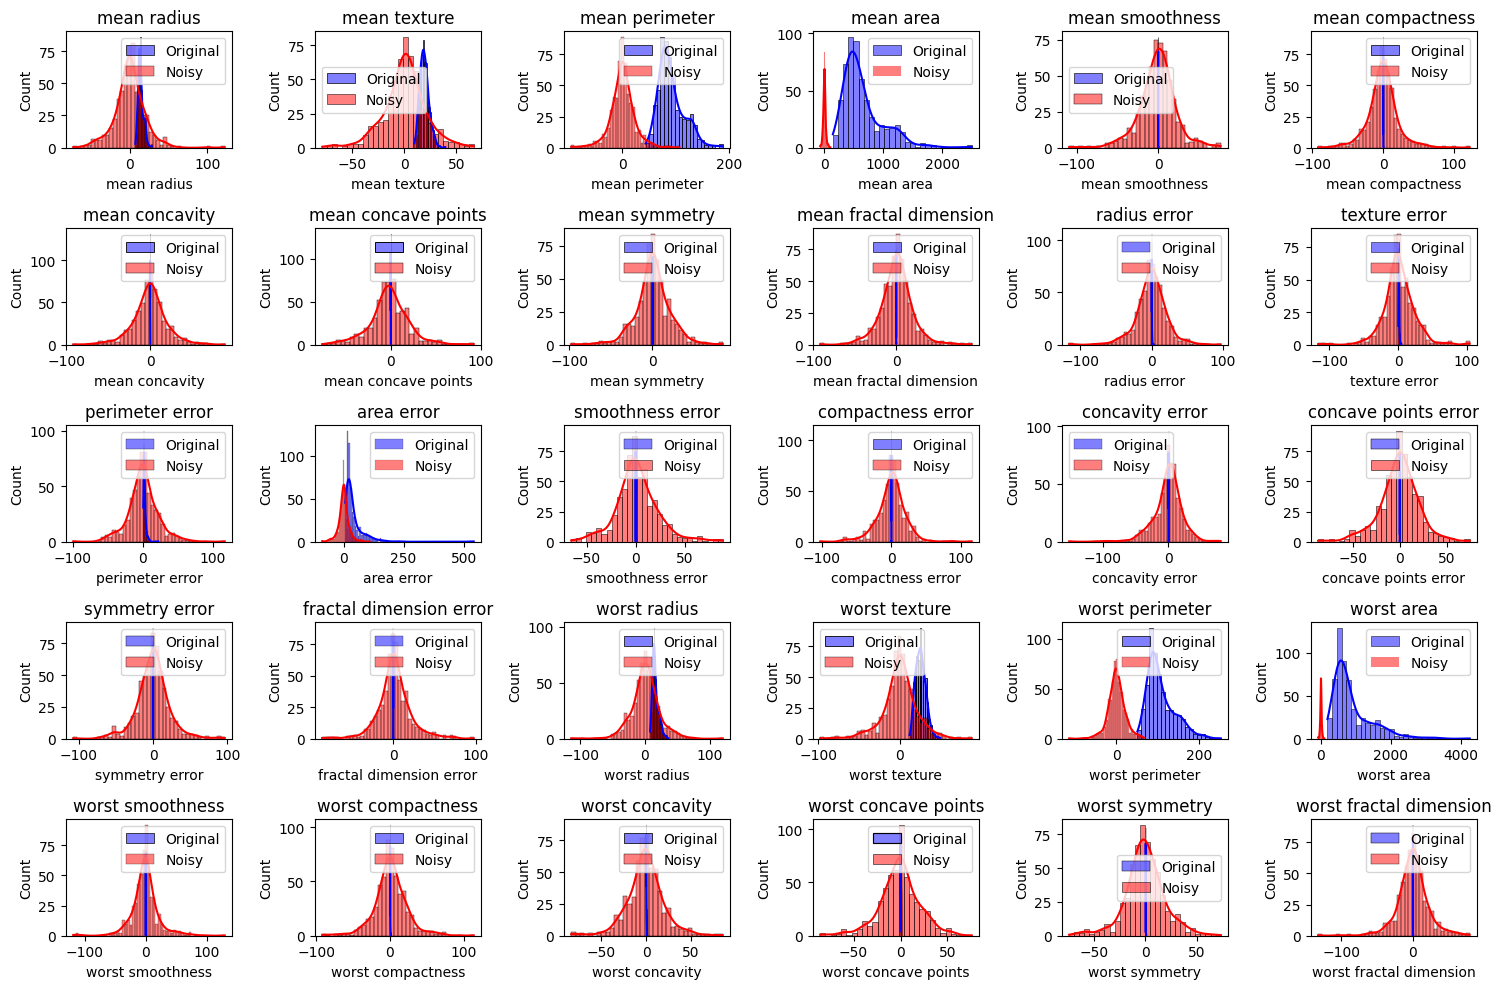

In [14]:
# Plot distributions of features before and after adding noise
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(df[feature], kde=True, color='blue', label='Original')
    sns.histplot(df_noisy[feature], kde=True, color='red', label='Noisy')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# You can also perform other exploratory data analysis tasks, such as correlation analysis, scatter plots, etc.

In [21]:
print(df_noisy)
df_noisy.head()

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     -17.368205    -13.421472        5.844090  31.970229        76.662066   
1       0.928312    -30.918055        2.214724 -23.324143         1.183548   
2     -20.289873     14.444368       -0.611815   3.595192        18.804403   
3       6.923659     11.339442       18.643394  -4.466179         7.636592   
4      -2.059626     -0.844633      -15.292178 -12.288377        52.790781   
..           ...           ...             ...        ...              ...   
564    -5.696549     -7.451467       -1.885489  32.354190         1.403449   
565    23.746911      9.346089      -75.979448 -29.775748         4.565860   
566    -0.088234      5.272598      -35.986740 -64.342063       -11.485938   
567    11.549624     -0.224393        1.050831   0.313969        16.691397   
568    26.967539      5.911007       25.765762  -1.410453        -6.307689   

     mean compactness  mean concavity  mean concave points  mea

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-17.368205,-13.421472,5.844090,31.970229,76.662066,-48.608906,-5.958586,18.934478,-19.132009,5.627164,...,0.095924,7.793720,-4.964250,12.071907,3.105472,-20.113428,-9.506268,-5.203558,16.734518,-18.268615
1,0.928312,-30.918055,2.214724,-23.324143,1.183548,14.157631,-18.297307,9.024092,-8.389452,8.480038,...,42.882650,-49.458623,5.030909,-8.232308,73.830264,17.451250,10.506500,-38.532734,-9.768395,-15.252578
2,-20.289873,14.444368,-0.611815,3.595192,18.804403,-5.967817,10.011621,-4.976539,37.162975,-0.507786,...,8.265502,-23.957330,6.275371,9.010312,68.672775,25.436740,4.413391,24.729347,21.745020,25.366995
3,6.923659,11.339442,18.643394,-4.466179,7.636592,-0.505750,9.998902,-38.562017,4.205672,8.636741,...,19.353387,-0.882009,2.637993,22.150603,-36.170671,11.625196,15.750734,8.347249,2.989022,11.538347
4,-2.059626,-0.844633,-15.292178,-12.288377,52.790781,3.239295,-37.220648,9.501581,-41.431005,-7.798269,...,14.027252,-4.617487,1.053898,6.110704,2.941963,-8.926306,-8.179467,-8.519081,-9.281223,-16.549534


df.head()

In [20]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

K-Means clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [23]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_noisy)

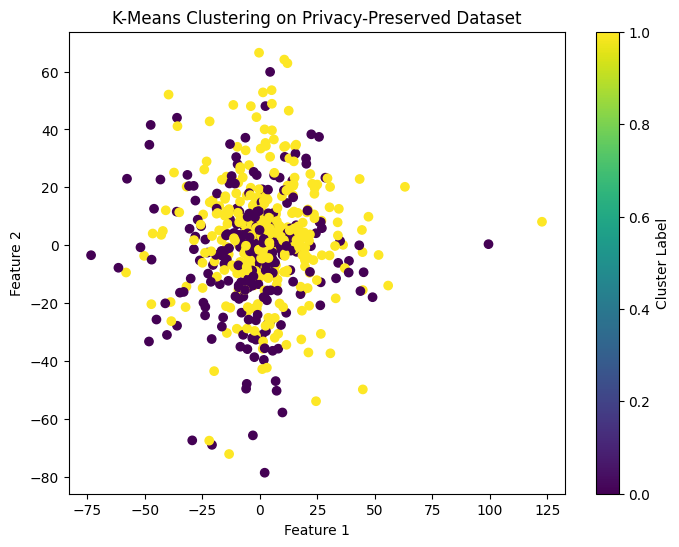

In [24]:
# Visualize the clusters (you can choose any visualization method here)
# For example, you can plot the first two features against each other with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering on Privacy-Preserved Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [25]:
# Compute performance metrics
silhouette = silhouette_score(X_noisy, cluster_labels)
davies_bouldin = davies_bouldin_score(X_noisy, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_noisy, cluster_labels)


In [26]:
# Print the performance metrics
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.03125106531268117
Davies-Bouldin Index: 5.542187315086605
Calinski-Harabasz Index: 17.331511033094973


Hierarchical clustering


Agglomerative clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [30]:
# Perform hierarchical clustering using linkage
Z = linkage(X_noisy, method='ward')

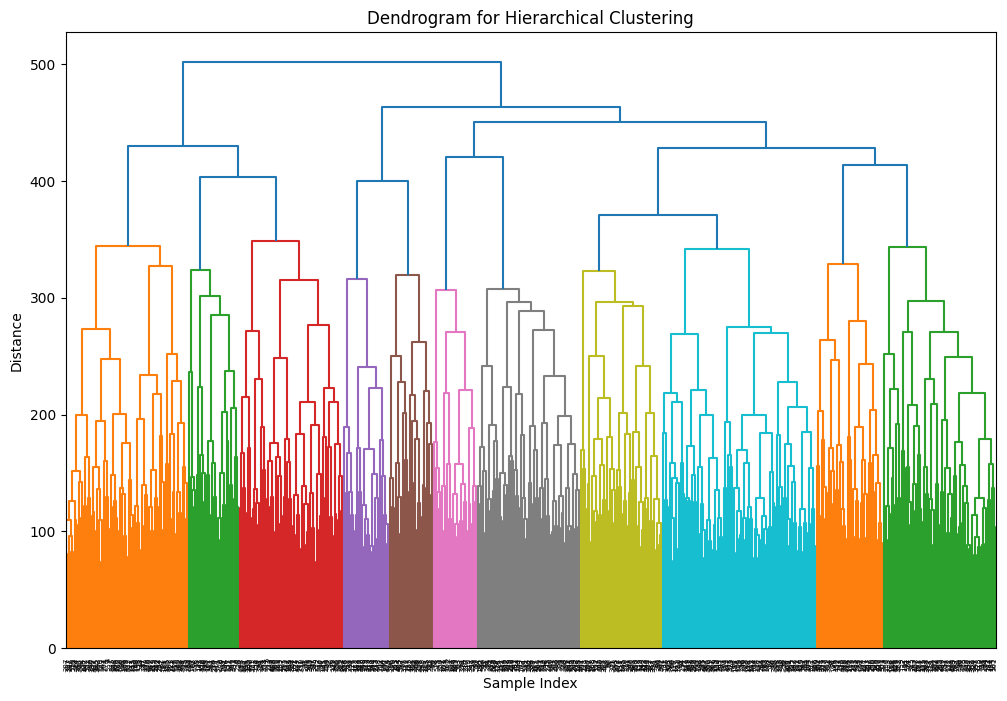

In [31]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [32]:
# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
cluster_labels = hierarchical.fit_predict(X_noisy)

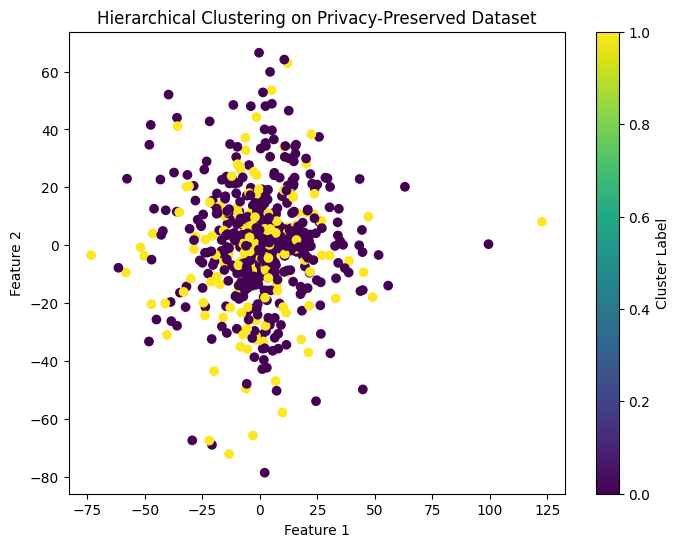

In [33]:
# Visualize the clusters (you can choose any visualization method here)
# For example, you can plot the first two features against each other with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Hierarchical Clustering on Privacy-Preserved Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [34]:
# Compute performance metrics
silhouette = silhouette_score(X_noisy, cluster_labels)
davies_bouldin = davies_bouldin_score(X_noisy, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_noisy, cluster_labels)


In [35]:
# Print the performance metrics
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.019147391701998268
Davies-Bouldin Index: 7.045499256157556
Calinski-Harabasz Index: 9.217924434390778


DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X_noisy)

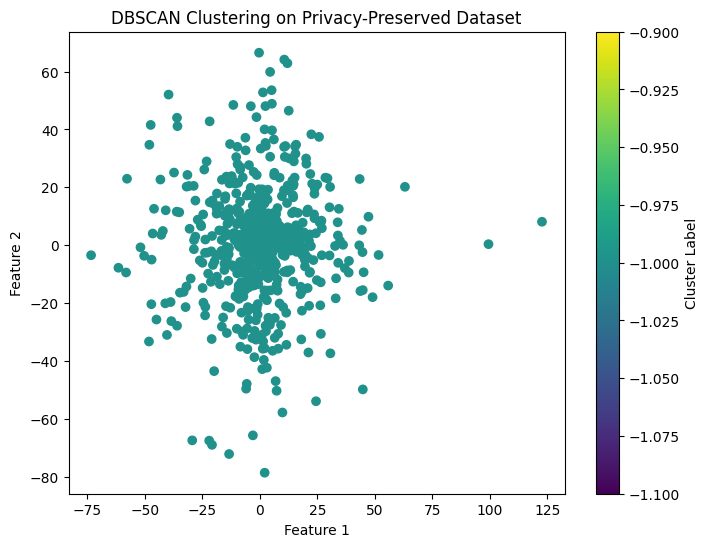

In [43]:
# Visualize the clusters (you can choose any visualization method here)
# For example, you can plot the first two features against each other with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering on Privacy-Preserved Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [44]:

# Check if there are more than one cluster
unique_labels = np.unique(cluster_labels)
if len(unique_labels) > 1:  # Check if there are clusters other than noise (-1)
    # Compute performance metrics
    silhouette = silhouette_score(X_noisy, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_noisy, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_noisy, cluster_labels)

    # Print the performance metrics
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Index:", davies_bouldin)
    print("Calinski-Harabasz Index:", calinski_harabasz)
else:
    print("DBSCAN clustered all points as noise.")

DBSCAN clustered all points as noise.
